# Cagampang

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [40]:
data = pd.read_csv("property24.csv")

data.head()

,Type,Location,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Garden,Pet Friendly,Reservation Fee,Price,Link
0,House and Lot,Las Pinas City,2,1,2,67.0,55.0,1,yes,yes,0,3900001,2 bedroom House / Lot for sale in Las Pinas Ci...
1,House and Lot,Las Pinas City,3,2,2,78.0,58.0,1,yes,yes,30000,4987000,3 bedroom House / Lot for sale in Las Pinas Ci...
2,House and Lot,Quezon City,3,2,2,65.0,60.0,1,yes,yes,50000,4200000,3 bedroom House / Lot for sale in Quezon City ...
3,Townhouse,Las Pinas City,3,2,2,70.0,52.0,1,yes,yes,30000,4480000,3 bedroom Townhouse for sale in Las Pinas City...
4,House and Lot,Quezon City,3,2,2,65.0,48.0,1,yes,yes,50000,3800000,3 bedroom House / Lot for sale in Quezon City ...


### Check for Nulls

In [41]:
display('-'*100)
display(data.isnull().any())

'----------------------------------------------------------------------------------------------------'

Type               False
Location           False
Bedrooms           False
Bathrooms          False
Floor              False
Floors Area        False
Lot Area           False
Garage             False
Garden             False
Pet Friendly       False
Reservation Fee    False
Price              False
Link               False
dtype: bool

### Drop not needed column/s

In [42]:
prefinal_data = data.drop(['Link'], axis = 1)

prefinal_data.head()

,Type,Location,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Garden,Pet Friendly,Reservation Fee,Price
0,House and Lot,Las Pinas City,2,1,2,67.0,55.0,1,yes,yes,0,3900001
1,House and Lot,Las Pinas City,3,2,2,78.0,58.0,1,yes,yes,30000,4987000
2,House and Lot,Quezon City,3,2,2,65.0,60.0,1,yes,yes,50000,4200000
3,Townhouse,Las Pinas City,3,2,2,70.0,52.0,1,yes,yes,30000,4480000
4,House and Lot,Quezon City,3,2,2,65.0,48.0,1,yes,yes,50000,3800000


### Identify unique values of the categorical columns

In [43]:
type_values = prefinal_data['Type'].unique()
location_values = prefinal_data['Location'].unique()
garden_values = prefinal_data['Garden'].unique()
pet_friendly_values = prefinal_data['Pet Friendly'].unique()

print('Categorical Unique Values')

print('-'*100)
print('Location unique values: ')
print(location_values)

print('-'*100)
print('Type unique values: ')
print(type_values)

print('-'*100)
print('Garden: ')
print(garden_values)

print('-'*100)
print('Pet Friendly: ')
print(pet_friendly_values)

Categorical Unique Values
----------------------------------------------------------------------------------------------------
Location unique values: 
['Las Pinas City' 'Quezon City' 'Pasig City' 'Muntinlupa City'
 'Marikina City' 'Paranaque City' 'Caloocan City' 'Taguig City'
 'Manila City']
----------------------------------------------------------------------------------------------------
Type unique values: 
['House and Lot' 'Townhouse']
----------------------------------------------------------------------------------------------------
Garden: 
['yes' 'no']
----------------------------------------------------------------------------------------------------
Pet Friendly: 
['yes' 'no']


### Check for duplicates

In [44]:
# removed duplicates
num_duplicates = len(prefinal_data) - len(prefinal_data.drop_duplicates(keep=False))

# before removing duplicates
print('Before:')
print('duplicates: {0}'.format(num_duplicates))
print('total instances: ', len(prefinal_data))

# removed duplicates
remaining_data = prefinal_data.drop_duplicates()

# afer removing
print('-'*100)
print('After:')
print('total instances: ', len(remaining_data))

Before:
duplicates: 73
total instances:  365
----------------------------------------------------------------------------------------------------
After:
total instances:  325


### Variable Creation

In [45]:
# encode categorical variables
dummy_type = pd.get_dummies(remaining_data['Type'], prefix='Type')
dummy_location = pd.get_dummies(remaining_data['Location'], prefix='Location')
dummy_pet_friendly = pd.get_dummies(remaining_data['Pet Friendly'], prefix='Pet Friendly')
dummy_garden = pd.get_dummies(remaining_data['Garden'], prefix='Garden')


cleaned_df = remaining_data.drop(['Location', 'Type', 'Pet Friendly', 'Garden'], axis=1)

# only include n-1 for the created columns for the categorical variable
# to avoid dummy variable trap

cleaned_df['Type_Townhouse'] = dummy_type['Type_Townhouse']

cleaned_df['Location_Quezon City'] = dummy_location['Location_Quezon City']
cleaned_df['Location_Pasig City'] = dummy_location['Location_Pasig City']
cleaned_df['Location_Muntinlupa City'] = dummy_location['Location_Muntinlupa City']
cleaned_df['Location_Marikina City'] = dummy_location['Location_Marikina City']
cleaned_df['Location_Paranaque City'] = dummy_location['Location_Paranaque City']
cleaned_df['Location_Caloocan City'] = dummy_location['Location_Caloocan City']
cleaned_df['Location_Taguig City'] = dummy_location['Location_Taguig City']
cleaned_df['Location_Manila City'] = dummy_location['Location_Manila City']

cleaned_df['Type_Townhouse'] = dummy_type['Type_Townhouse']

cleaned_df['Garden_yes'] = dummy_garden['Garden_yes']
cleaned_df['Pet_Friendly_yes'] = dummy_pet_friendly['Pet Friendly_yes']

# Location
#   1. Las Pinas City
#   2. Quezon City
#   3. Pasig City
#   4. Muntinlupa City
#   5. Marikina City
#   6. Paranaque City
#   7. Caloocan City
#   8. Taguig City
#   9. Manila City

# Type
#   1. House and Lot
#   2. Townhouse

# Garden
#   1. Yes
#   2. No

# Pet Friendly
#   1. Yes
#   2. No

cleaned_df.head()

,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Reservation Fee,Price,Type_Townhouse,Location_Quezon City,Location_Pasig City,Location_Muntinlupa City,Location_Marikina City,Location_Paranaque City,Location_Caloocan City,Location_Taguig City,Location_Manila City,Garden_yes,Pet_Friendly_yes
0,2,1,2,67.0,55.0,1,0,3900001,0,0,0,0,0,0,0,0,0,1,1
1,3,2,2,78.0,58.0,1,30000,4987000,0,0,0,0,0,0,0,0,0,1,1
2,3,2,2,65.0,60.0,1,50000,4200000,0,1,0,0,0,0,0,0,0,1,1
3,3,2,2,70.0,52.0,1,30000,4480000,1,0,0,0,0,0,0,0,0,1,1
4,3,2,2,65.0,48.0,1,50000,3800000,0,1,0,0,0,0,0,0,0,1,1


### Convert data type

In [46]:
cleaned_df = cleaned_df.astype(float)

### Correlation Matrix

,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Reservation Fee,Price,Type_Townhouse,Location_Quezon City,Location_Pasig City,Location_Muntinlupa City,Location_Marikina City,Location_Paranaque City,Location_Caloocan City,Location_Taguig City,Location_Manila City,Garden_yes,Pet_Friendly_yes
Bedrooms,1.000000,0.422390,0.221428,-0.002845,0.221494,0.025130,0.178954,-0.060355,-0.093073,0.208622,0.157944,-0.063535,0.280967,-0.143744,0.261479,0.135145,0.061205,0.059952,0.008408
Bathrooms,0.422390,1.000000,0.097281,0.016403,0.029846,0.060994,0.189817,-0.096228,-0.052444,0.015494,0.101488,0.013874,0.112300,0.049496,-0.017727,0.071314,-0.081133,0.017861,-0.027360
Floor,0.221428,0.097281,1.000000,0.012469,-0.020902,0.026722,0.035243,-0.031087,0.031529,-0.060316,0.121943,0.006078,0.040509,-0.055759,0.012108,0.330690,-0.112303,-0.010604,0.067515
Floors Area,-0.002845,0.016403,0.012469,1.000000,0.030094,-0.009932,-0.035964,0.069617,0.085372,0.094553,-0.006354,-0.016218,-0.024751,0.096248,-0.024496,-0.003366,-0.006178,0.062080,-0.038679
Lot Area,0.221494,0.029846,-0.020902,0.030094,1.000000,0.113410,0.041495,0.045502,-0.159871,0.001670,0.059005,-0.055032,0.059765,-0.031404,0.173462,0.053064,0.117554,0.008863,-0.002466
Garage,0.025130,0.060994,0.026722,-0.009932,0.113410,1.000000,-0.018849,0.027578,0.020545,0.010867,-0.019895,-0.021135,0.048684,-0.022941,-0.042100,-0.013980,-0.009855,-0.046626,0.039393
Reservation Fee,0.178954,0.189817,0.035243,-0.035964,0.041495,-0.018849,1.000000,-0.931474,0.075577,0.058936,-0.018814,-0.026714,0.122516,0.137973,0.037623,0.019317,-0.038163,0.047912,0.037207
Price,-0.060355,-0.096228,-0.031087,0.069617,0.045502,0.027578,-0.931474,1.000000,-0.130130,-0.031945,0.058750,0.005841,-0.054407,-0.141356,-0.110192,-0.028841,0.056897,-0.039635,-0.056415
Type_Townhouse,-0.093073,-0.052444,0.031529,0.085372,-0.159871,0.020545,0.075577,-0.130130,1.000000,-0.091237,-0.018862,0.041444,0.008573,0.108015,-0.068179,0.071210,0.089890,0.057590,0.078291
Location_Quezon City,0.208622,0.015494,-0.060316,0.094553,0.001670,0.010867,0.058936,-0.031945,-0.091237,1.000000,-0.066936,-0.071108,-0.168916,-0.124249,-0.141648,-0.047035,-0.033156,0.040451,0.100537


<AxesSubplot:>

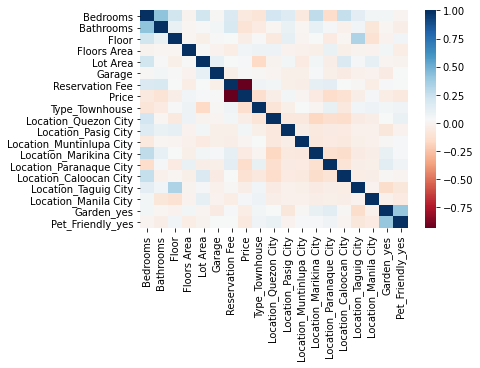

In [47]:
# Print out a correlation matrix of our data frame.
corr = cleaned_df.corr()
display(corr)

# plot the heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu" )

### Variance Inflation Factor

In [48]:
# Price is drop because it is dependent variable
cleaned_df_check = cleaned_df.drop(columns=['Price',])

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(cleaned_df_check)

# create the series for before the drop
series = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

# display the series
print('VIF score')
print('-'*100)
display(series)

VIF score
----------------------------------------------------------------------------------------------------


const                       71.960705
Bedrooms                     2.101989
Bathrooms                    1.341946
Floor                        1.239830
Floors Area                  1.049454
Lot Area                     1.149684
Garage                       1.038128
Reservation Fee              1.114123
Type_Townhouse               1.105361
Location_Quezon City         1.448772
Location_Pasig City          1.136628
Location_Muntinlupa City     1.040956
Location_Marikina City       1.463591
Location_Paranaque City      1.181385
Location_Caloocan City       1.431717
Location_Taguig City         1.215829
Location_Manila City         1.094219
Garden_yes                   1.276444
Pet_Friendly_yes             1.254238
dtype: float64

### Remove the outliers

In [49]:
# before removing outliers
print('Before:')
print('total instances: {0}'.format(len(cleaned_df)))

# filter the data frame to remove the values exceeding 3 standard deviations
cleaned_remove_df = cleaned_df[(np.abs(stats.zscore(cleaned_df)) < 3).all(axis=1)]

# what rows were removed
cleaned_outliers_df = cleaned_df.index.difference(cleaned_remove_df.index)

# total outliers
total_outliers = len(cleaned_outliers_df)

# assign the cleaned data (without outliers)
cleaned_df = cleaned_remove_df

# after removing outliers
print('-'*100)
print('After:')
print('outliers: ', cleaned_outliers_df.values)
print('total outliers index: ', len(cleaned_outliers_df))
print('cleaned instances: ', len(cleaned_df))

Before:
total instances: 325
----------------------------------------------------------------------------------------------------
After:
outliers:  [  8  11  17  26  28  30  33  44  45  49  54  56  67  71  72  74  84  86
  89  90  98 101 111 117 120 122 124 134 138 142 151 166 182 184 185 189
 192 199 203 230 258 265 288 300 301 306 314 315 325 331 332 334 341 342
 347 348 353]
total outliers index:  57
cleaned instances:  268


### Defining of the Xs and Y

In [50]:
# define our input variable (X) & output variable
X = cleaned_remove_df.drop('Price', axis = 1)
Y = cleaned_remove_df[['Price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

### Regression Model

In [51]:
# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Get multiple predictions
y_pred= regression_model.predict(X_test)

# Show the first 5 predictions
y_pred[:5]

array([[3992438.99631336],
       [4060234.55442781],
       [3858499.71430055],
       [4171473.79167492],
       [4539903.63187087]])

### R-Squared

In [53]:
print('Train Score: ', regression_model.score(X_train, y_train))
print('Test Score: ', regression_model.score(X_test, y_test))

Train Score:  0.9228833340837395
Test Score:  0.9412785003517631


### Accuracy

In [54]:
accuracy_train = regression_model.score(X_train,y_train)
accuracy_test = regression_model.score(X_test,y_test)

print('Accuracy Train: {0}%'.format(accuracy_train * 100))
print('Accuracy Train: {0}%'.format(accuracy_test * 100))

Accuracy Train: 92.28833340837394%
Accuracy Train: 94.12785003517631%
